## Tutorial: How to use weirwood pyfinance API

This python API allows you to retrieve financial statements (filings) and daily prices from more than 9000 companies.

For example, if we want to retrieve information about Tesla Motors we need to do the following:

### First of all, instantiate FinTen class. 

In [18]:
from weirwood_pyfinance import FinTen
finten = FinTen()

In [24]:
import seaborn as sns
sns.set_theme()
import pandas as pd
pd.options.mode.chained_assignment = None #Avoid pandas warnings
sns.set(rc={'figure.figsize':(15.00,8.00)}) #Figure size of seaborn plot

## Get filings

With _get_filings()_ you can download any of the available public companies financial statements as whe show in the following chunk 


In [25]:
tesla_filings = finten.get_filings('TSLA')
tesla_filings.head()

,DocumentType,EntityRegistrantName,CurrentFiscalYearEndDate,EntityCentralIndexKey,EntityFilerCategory,TradingSymbol,DocumentPeriodEndDate,DocumentFiscalYearFocus,DocumentFiscalPeriodFocus,Assets,...,GrossProfit,OperatingExpenses,NetCashFlow,NetCashFlowsOperating,NetCashFlowsInvesting,NetCashFlowsFinancing,StandardIndustrialClassification,StateCountry,Office,IndustryTitle
0,10-Q,"Tesla, Inc.",--12-31,1318605,Non-accelerated Filer,TSLA,2011-06-30,2011,Q2,646155000,...,18508000,77247000,319380000,NaN,NaN,NaN,3711,CA,Office of Manufacturing,MOTOR VEHICLES & PASSENGER CAR BODIES
1,10-Q,"Tesla, Inc.",--12-31,1318605,Non-accelerated Filer,TSLA,2011-09-30,2011,Q3,700250000,...,17224000,81701000,213328000,NaN,NaN,NaN,3711,CA,Office of Manufacturing,MOTOR VEHICLES & PASSENGER CAR BODIES
2,10-K,"Tesla, Inc.",--12-31,1318605,Large Accelerated Filer,TSLA,2011-12-31,2011,FY,713448000,...,61595000,313083000,155708000,-114364000.0,-175928000.0,446000000.0,3711,CA,Office of Manufacturing,MOTOR VEHICLES & PASSENGER CAR BODIES
3,10-Q,"Tesla, Inc.",--12-31,1318605,Large Accelerated Filer,TSLA,2012-03-31,2012,Q1,761100000,...,10210000,98973000,-36696000,-50087000.0,-79440000.0,92831000.0,3711,CA,Office of Manufacturing,MOTOR VEHICLES & PASSENGER CAR BODIES
4,10-Q,"Tesla, Inc.",--12-31,1318605,Large Accelerated Filer,TSLA,2012-06-30,2012,Q2,776869000,...,4762000,110937000,210554000,NaN,NaN,NaN,3711,CA,Office of Manufacturing,MOTOR VEHICLES & PASSENGER CAR BODIES


In [26]:
tesla_filings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DocumentType                      39 non-null     object 
 1   EntityRegistrantName              39 non-null     object 
 2   CurrentFiscalYearEndDate          39 non-null     object 
 3   EntityCentralIndexKey             39 non-null     int64  
 4   EntityFilerCategory               39 non-null     object 
 5   TradingSymbol                     39 non-null     object 
 6   DocumentPeriodEndDate             39 non-null     object 
 7   DocumentFiscalYearFocus           39 non-null     object 
 8   DocumentFiscalPeriodFocus         39 non-null     object 
 9   Assets                            39 non-null     int64  
 10  CurrentAssets                     39 non-null     int64  
 11  NoncurrentAssets                  39 non-null     int64  
 12  Liabilitie

<AxesSubplot:xlabel='DocumentPeriodEndDate', ylabel='Liabilities'>

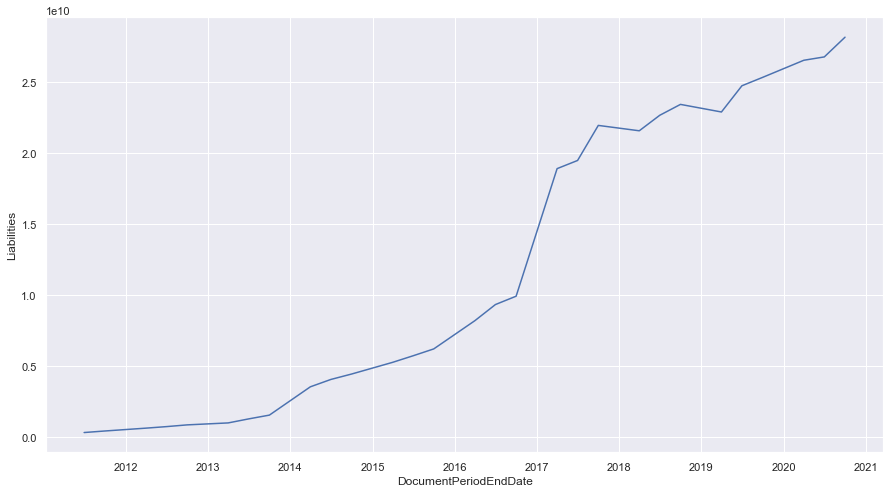

In [29]:
tesla_assets = tesla_filings[tesla_filings.DocumentType == '10-Q']
tesla_assets['DocumentPeriodEndDate'] = tesla_assets['DocumentPeriodEndDate'].astype('datetime64').copy()
sns.lineplot(x='DocumentPeriodEndDate', y='Liabilities',data=tesla_assets)

## Available companies

Using _.get_tickers()_ we can get a list of available companies

In [9]:
all_available_tickers = finten.get_tickers()
all_available_tickers.sample(10)

,0
4533,IPV
3905,GWPH
1568,CCR
6037,NTEC
4746,JWHI
5863,NG
8783,V
1884,CMHZ
2183,CTK
5380,MEIP



## Get prices
We can also download daily prices using _.get_prices()_ public method

In [5]:
tesla_prices = finten.get_prices('TSLA')
tesla_prices.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200
2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100
2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100
2021-10-21,856.000000,900.000000,855.500000,894.000000,894.000000,31481500
2021-10-22,895.500000,910.000000,890.960022,909.679993,909.679993,22836800
